Headers del archivo:

In [1]:
%matplotlib inline
import time
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def multp(N):
    A = np.ones((N,N), dtype=np.int64)
    B = np.ones((N,N)) + np.ones((N,N), dtype = np.int64)
    t0 = time.clock()
    np.dot(A,B)
    t1 = time.clock()
    return t1 - t0

def multpNoNumpy(N):
    A = [[1]*N]*N
    B = [[2]*N]*N
    C = [[0]*N]*N
    t0 = time.clock()
    for i in range(N):
        for j in  range(N):
            for k in range(N):
                C[i][j] += A[i][k]*B[k][j];
    t1 = time.clock()
    return t1 - t0


In [3]:
def test(N):
    X = np.arange(2,N)
    Y = [np.average([multp(i) for j in range(10)], axis = 0) for i in range(2,N)]
    plt.xlabel('N')
    plt.ylabel('Tiempo(ms)')
    plt.title('Tiempo total para multiplicación matrices 1\'s y 2\'s')
    plt.plot(X,Y)
    return Y

def test1(N, t):
    print('[')
    for i in range(2,N):
        A = np.average([multp(i) for j in range(t)])
        print(A, ',')
    print(']')

Tiempo promedio por operación elemental:

In [4]:
def test1(N, t):
    X = np.arange(2,N)
    Y =  [np.average([multp(i) for j in range(t)]) for i in range(2,N)]
    tAvg =  [Y[i-2]/(2*i*i*i - i*i) for i in range(2,N)]
    plt.xlabel('N')
    plt.ylabel('Tiempo(ms)')
    plt.title('Tiempo por operación elemental matrices 1\'s y 2\'s')
    plt.plot(X,tAvg)
    print(X)
    return tAvg


[2 3 4 5 6 7 8 9]


[6.8408333333338145e-05,
 1.0666666666529303e-07,
 4.1964285714203768e-08,
 2.2666666666479629e-08,
 1.4393939393820619e-08,
 8.0062794348196554e-09,
 5.312499999979292e-09,
 3.8489469861916283e-09]

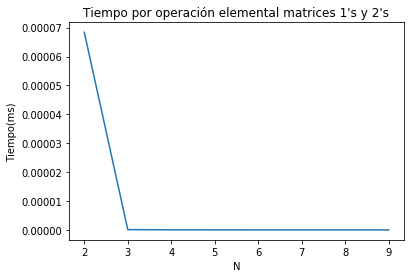

In [5]:
test1(10,10)

Comparación local (C++, Java, Python)

In [45]:
Cpp=[
2.41667e-07,
5.11111e-08,
2.5e-08,
1.77778e-08,
1.36364e-08,
1.17739e-08,
1.04167e-08,
9.94916e-09,
9.42105e-09,
9.09091e-09,
8.75604e-09,
8.66272e-09,
8.5034e-09,
8.38314e-09,
8.37954e-09,
8.19964e-09,
8.22751e-09,
8.76694e-09,
8.53846e-09,
8.55041e-09,
8.24044e-09,
3.36064e-09,
3.33924e-09,
3.34367e-09,
3.34726e-09,
3.41641e-09,
3.32096e-09,
3.3252e-09,
3.31827e-09,
3.49875e-09,
4.21627e-09,
3.52193e-09,
3.47828e-09,
3.47353e-09,
3.62002e-09,
3.47419e-09,
3.47091e-09,
3.45893e-09,
3.43671e-09,
3.51275e-09,
3.40887e-09,
3.4187e-09,
3.5314e-09,
3.40796e-09,
3.41563e-09,
3.40786e-09,
3.39638e-09,
3.37746e-09,
3.53737e-09,
3.38408e-09,
3.38441e-09,
3.46234e-09,
3.48705e-09,
3.47441e-09,
3.42061e-09,
3.44803e-09,
3.41881e-09,
3.42641e-09,
3.45191e-09,
3.3944e-09,
3.4151e-09,
3.41849e-09,
3.3653e-09,
3.40113e-09,
3.35976e-09,
3.40749e-09,
3.3737e-09,
3.40004e-09,
3.38702e-09,
3.38698e-09,
3.44416e-09,
3.63774e-09,
3.76734e-09,
3.3915e-09,
3.36882e-09,
4.07281e-09,
3.57256e-09,
3.35505e-09,
3.34365e-09,
3.36451e-09,
3.35069e-09,
3.35599e-09,
3.34238e-09,
3.32467e-09,
3.34399e-09,
3.35434e-09,
3.37434e-09,
3.36401e-09,
3.34009e-09,
3.342e-09,
3.31523e-09,
3.34611e-09,
3.32246e-09,
3.32504e-09,
3.32929e-09,
3.32159e-09,
3.32596e-09,
3.34251e-09,
3.32628e-09,
]
Numpy=[
1.11666666953e-06 ,
2.80000000304e-07 ,
1.93750000221e-07 ,
7.82222222268e-08 ,
6.81818180671e-08 ,
2.00941914363e-08 ,
1.42708333565e-08 ,
1.2999273759e-08 ,
7.42105264276e-09 ,
5.62770562692e-09 ,
5.94806764186e-09 ,
3.66863905206e-09 ,
3.26908541873e-09 ,
2.81992336801e-09 ,
2.48235887473e-09 ,
2.22292125083e-09 ,
1.57848324217e-09 ,
1.45242195248e-09 ,
1.39102564261e-09 ,
1.28311487124e-09 ,
9.22544685614e-10 ,
9.78785969251e-10 ,
7.31382976877e-10 ,
6.23673471154e-10 ,
5.56909153448e-10 ,
7.99751532956e-10 ,
5.86734693714e-10 ,
3.9843961932e-10 ,
3.44632767706e-10 ,
2.76351478217e-10 ,
2.58866567335e-10 ,
2.40163876564e-10 ,
2.40148738144e-10 ,
2.08222419684e-10 ,
2.61910972208e-10 ,
4.2326665795e-10 ,
5.92797783697e-10 ,
4.9352357056e-10 ,
3.74208860804e-10 ,
3.29756685187e-10 ,
3.96825396988e-10 ,
3.88127127429e-10 ,
4.04911180696e-10 ,
4.01720072127e-10 ,
3.18868277302e-10 ,
3.38303226756e-10 ,
2.63157894696e-10 ,
2.59342112441e-10 ,
2.73131313177e-10 ,
2.52378179093e-10 ,
1.86706497323e-10 ,
2.22414348647e-10 ,
1.80441777971e-10 ,
1.67412237531e-10 ,
2.05690384265e-10 ,
1.62337220189e-10 ,
1.38551413951e-10 ,
1.33570027221e-10 ,
1.23716153134e-10 ,
1.22156800565e-10 ,
9.11567387688e-11 ,
1.38876291205e-10 ,
1.30528727896e-10 ,
1.37424888816e-10 ,
8.62195866278e-11 ,
8.77667547169e-11 ,
1.10694604633e-10 ,
8.55491010726e-11 ,
9.30847158994e-11 ,
1.04110830161e-10 ,
1.0157666405e-10 ,
9.91322691506e-11 ,
8.09966061146e-11 ,
9.31841909248e-11 ,
9.91772303071e-11 ,
7.71658525225e-11 ,
6.62764310542e-11 ,
8.85861627161e-11 ,
8.54952829818e-11 ,
8.04679638008e-11 ,
8.14772101364e-11 ,
5.69199030377e-11 ,
6.47514495211e-11 ,
5.60185090285e-11 ,
6.5311105415e-11 ,
6.24695956929e-11 ,
5.99173553884e-11 ,
6.24100848794e-11 ,
5.64866542584e-11 ,
5.94451386845e-11 ,
5.77179336363e-11 ,
5.42477962168e-11 ,
5.55578419114e-11 ,
4.97735566864e-11 ,
6.1354712042e-11 ,
5.37463579429e-11 ,
4.90180373539e-11 ,
5.62462029804e-11 ,
5.11231512454e-11
]
Python=[
5.75000000443e-07 ,
3.06666666398e-07 ,
2.58035714345e-07 ,
2.0533333332e-07 ,
1.96212121205e-07 ,
2.32653061226e-07 ,
1.74583333343e-07 ,
1.66158315171e-07 ,
1.66105263157e-07 ,
1.58638331363e-07 ,
1.61020531403e-07 ,
1.61680473374e-07 ,
1.58484504913e-07 ,
1.63724137929e-07 ,
1.58177923387e-07 ,
1.57229736813e-07 ,
1.58209876544e-07 ,
1.56315040803e-07 ,
1.58320512819e-07 ,
1.55439411538e-07 ,
1.54612723429e-07 ,
1.65103969754e-07 ,
1.58614066194e-07 ,
1.60940408164e-07 ,
1.5837974243e-07 ,
1.55581437482e-07 ,
1.58031076067e-07 ,
1.58030331477e-07 ,
1.52013182674e-07 ,
1.51457668753e-07 ,
1.56646825397e-07 ,
1.54034046761e-07 ,
1.52755254867e-07 ,
1.52991422656e-07 ,
1.51596461485e-07 ,
1.50806007785e-07 ,
1.51719298246e-07 ,
1.49727195881e-07 ,
1.52449367088e-07 ,
1.52032520325e-07 ,
1.51111930716e-07 ,
1.501014857e-07 ,
1.50371663342e-07 ,
1.46474684422e-07 ,
1.50407154282e-07 ,
1.5164210926e-07 ,
1.49940606725e-07 ,
1.49472942975e-07 ,
1.49487676768e-07 ,
1.49408262626e-07 ,
1.49029126214e-07 ,
1.48719252742e-07 ,
1.46531864159e-07 ,
1.47359769505e-07 ,
1.50609314672e-07 ,
1.49224131591e-07 ,
1.48540040325e-07 ,
1.58103943999e-07 ,
1.57607142857e-07 ,
1.4936289676e-07 ,
1.48554605213e-07 ,
1.48144923154e-07 ,
1.48499784695e-07 ,
1.48911701298e-07 ,
1.48137341493e-07 ,
1.50057534123e-07 ,
1.49485133923e-07 ,
1.49280881616e-07 ,
1.49509176332e-07 ,
1.49426757328e-07 ,
1.46198226927e-07 ,
1.47386648203e-07 ,
1.49684212619e-07 ,
1.49875615213e-07 ,
1.53890269854e-07 ,
1.55396373425e-07 ,
1.53584971687e-07 ,
1.50443798305e-07 ,
1.60597189465e-07 ,
1.64352881368e-07 ,
1.52171874031e-07 ,
1.50701381649e-07 ,
1.5781735848e-07 ,
1.50515427612e-07 ,
1.50851179237e-07 ,
1.50840017504e-07 ,
1.50319510035e-07 ,
1.7538232418e-07 ,
1.51898199876e-07 ,
1.49839911773e-07 ,
1.49885467993e-07 ,
1.4878301819e-07 ,
1.47991505339e-07 ,
1.4823585279e-07 ,
1.50798122546e-07 ,
1.50572789695e-07 ,
1.49533367507e-07 ,
1.55115788972e-07 ,
1.49812311258e-07
]
Java =[
1.8235000000000002E-6,
6.667777777777778E-7,
4.831696428571429E-7,
3.8447555555555555E-7,
3.038207070707071E-7,
3.0200470957613817E-7,
3.2447499999999997E-7,
4.204110384894699E-7,
4.104815789473684E-7,
2.7030853994490356E-7,
2.119867149758454E-7,
5.167100591715976E-8,
8.425037792894937E-8,
8.464091954022988E-8,
8.422769657258065E-8,
8.28713431896823E-8,
8.511507936507937E-8,
8.318222654787752E-8,
8.342775641025641E-8,
8.35258558708036E-8,
8.384960599654045E-8,
8.574152488972905E-8,
7.84936835106383E-8,
4.227317551020408E-8,
4.3625130525583014E-8,
3.584921189533349E-8,
3.188244434137291E-8,
2.916961845755888E-8,
7.298009416195857E-8,
2.2424421282475563E-8,
7.629588293650794E-9,
7.487024087024088E-9,
8.36395444920725E-9,
1.1812162082224194E-8,
8.24406624934794E-9,
7.526611765412209E-9,
8.225650969529086E-9,
7.556417941033326E-9,
8.465348101265823E-9,
7.470163997032924E-9,
7.963944212223043E-9,
9.631221964177774E-9,
1.638792509736867E-8,
1.3042463587182688E-8,
9.314080059826752E-9,
7.530858608721896E-9,
7.708575475146199E-9,
7.48399936452595E-9,
7.545579797979799E-9,
7.392244414752894E-9,
7.87365355891308E-9,
8.017159131363474E-9,
7.506929220671E-9,
7.747959663355827E-9,
8.420944222283508E-9,
1.290128480648913E-8,
1.3010972961794966E-8,
8.04201071997682E-9,
8.038846872082166E-9,
7.633565135116526E-9,
7.734152263478931E-9,
7.366726127488032E-9,
7.416940283587599E-9,
7.80119444062199E-9,
7.450584961341382E-9,
7.365444687682673E-9,
7.442807253620403E-9,
7.996092031208557E-9,
7.435755395683453E-9,
8.109915712434631E-9,
7.846920055253389E-9,
8.173283465229292E-9,
7.974835149545575E-9,
8.003377777777778E-9,
7.741202463722919E-9,
8.446125557661082E-9,
9.847041420118343E-9,
9.59194845673311E-9,
8.008483687106918E-9,
8.968451824776749E-9,
9.026496060262113E-9,
9.282422131021348E-9,
9.343799645606745E-9,
1.068774185622735E-8,
9.66567593040651E-9,
8.96228226329331E-9,
8.307891824085006E-9,
7.971803480271637E-9,
7.876814263052623E-9,
8.166864705933371E-9,
7.958067985786151E-9,
7.904920112620425E-9,
8.217445404434459E-9,
9.47375807940905E-9,
9.28033876890634E-9,
8.987873477989601E-9,
8.120976836574503E-9,
9.280173420613353E-9,
8.360581407035176E-9,
]

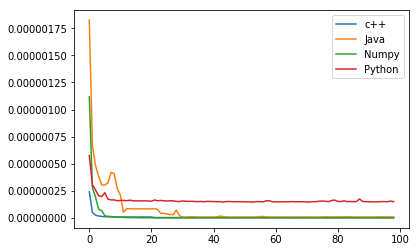

In [46]:
plt.plot(Cpp,label='c++')
plt.plot(Java,label='Java')
plt.plot(Numpy,label='Numpy')
plt.plot(Python,label='Python')
plt.legend(loc='upper right');

Comparación Desktop: 

In [47]:
Java=[
4.266666666666667E-7,
2.2755555555555557E-7,
1.885714285714286E-7,
1.8488444444444443E-7,
1.9636363636363635E-7,
2.0747409733124018E-7,
3.01665625E-7,
2.6143790849673207E-7,
1.5141E-7,
1.5061747343565525E-7,
1.1352657004830917E-7,
5.937988165680473E-8,
1.856385109599395E-7,
2.5158620689655174E-8,
2.475806451612903E-8,
2.459452658068575E-8,
2.4437301587301586E-8,
2.6544807965860597E-8,
4.929205128205128E-8,
2.4582655826558267E-8,
3.108965981164712E-8,
2.394110480991388E-8,
2.7269429669030732E-8,
2.7470367346938778E-8,
2.541356305835944E-8,
2.0672334808603154E-8,
1.896101576994434E-8,
1.3884848864134176E-8,
4.790960451977401E-9,
4.754576005185855E-9,
4.732127356150793E-9,
4.6834781380235926E-9,
4.718277126478335E-9,
4.660372670807453E-9,
4.691347157016171E-9,
4.6525010756776766E-9,
4.819187442289936E-9,
4.653107576184499E-9,
4.693662974683545E-9,
4.650957322581356E-9,
4.653156845067344E-9,
5.489256513854866E-9,
4.721175311104778E-9,
5.175735885698432E-9,
4.653181412160618E-9,
5.325608337349163E-9,
4.6958972953216375E-9,
4.5918925533604985E-9,
4.635139393939394E-9,
4.593503641021542E-9,
4.638349514563107E-9,
4.79546017054027E-9,
4.625456713203338E-9,
4.65064826749564E-9,
4.614804536679537E-9,
4.75113104917238E-9,
4.625533784831722E-9,
5.061501140501428E-9,
5.108480392156862E-9,
4.60552015476156E-9,
4.5968228386758365E-9,
4.577543965734442E-9,
4.626585952878937E-9,
4.606599697261594E-9,
4.64098479591193E-9,
4.573507169572405E-9,
4.594628668460849E-9,
5.160652932816359E-9,
4.928013507561297E-9,
4.942377469290822E-9,
4.8994080764914095E-9,
4.950075384525789E-9,
4.9011232688838865E-9,
4.974136316181953E-9,
4.9641219203463516E-9,
4.928371348539416E-9,
4.892521897732816E-9,
4.895493842343165E-9,
4.870111045597484E-9,
4.942421858507026E-9,
4.9047483056754855E-9,
4.930252444608665E-9,
4.875403953996768E-9,
4.890828607112876E-9,
4.991334813507538E-9,
4.884162430113095E-9,
4.9182851239669425E-9,
4.895105408850249E-9,
4.878887509483412E-9,
4.971440313678187E-9,
5.020489866435278E-9,
5.1213769440616474E-9,
4.885590184055021E-9,
4.910695452080494E-9,
4.857279850203607E-9,
4.893724286690563E-9,
4.87128974038595E-9,
4.87706009487274E-9,
4.90627688442211E-9,
]

Cpp=[
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
1.88964e-008,
0,
0,
0,
0,
7.48671e-009,
0,
0,
4.80492e-009,
0,
3.69385e-009,
0,
2.90057e-009,
2.58819e-009,
2.31911e-009,
2.08607e-009,
1.88324e-009,
1.70587e-009,
1.5501e-009,
2.82546e-009,
2.58224e-009,
2.36616e-009,
1.08677e-009,
2.00126e-009,
1.84672e-009,
2.56154e-009,
1.58228e-009,
2.20327e-009,
2.04901e-009,
2.5451e-009,
1.78113e-009,
2.21945e-009,
2.07732e-009,
1.94707e-009,
2.28436e-009,
2.14687e-009,
2.0202e-009,
2.28397e-009,
1.79525e-009,
2.37332e-009,
1.923e-009,
1.8197e-009,
2.01094e-009,
2.17902e-009,
2.06793e-009,
2.2098e-009,
2.10084e-009,
1.99893e-009,
2.11501e-009,
2.01562e-009,
2.1146e-009,
2.01826e-009,
1.92767e-009,
2.17742e-009,
1.92234e-009,
2.14639e-009,
2.0555e-009,
1.96966e-009,
2.02344e-009,
1.94123e-009,
2.11187e-009,
1.90902e-009,
2.0638e-009,
2.0945e-009,
2.0148e-009,
2.04116e-009,
2.06368e-009,
1.98803e-009,
2.09852e-009,
2.02343e-009,
2.03674e-009,
2.04746e-009,
1.97673e-009,
2.06195e-009,
2.13991e-009,
1.99712e-009,
1.93117e-009,
2.00152e-009,
2.0014e-009,
1.99992e-009,
2.0577e-009,
1.99329e-009,
2.04516e-009,
1.92738e-009,
2.02907e-009,
1.9681e-009,
2.01005e-009,
]

Numpy=[
4.45332053308e-07 ,
1.28710740278e-07 ,
6.3999815276e-08 ,
4.25243219474e-08 ,
1.40605653091e-08 ,
8.74094797868e-09 ,
8.39997582602e-09 ,
7.57586775225e-09 ,
5.45682644913e-09 ,
4.0298978631e-09 ,
3.14974937812e-09 ,
3.07502072375e-09 ,
2.46711308999e-09 ,
1.98620116137e-09 ,
1.64515655006e-09 ,
1.40253344372e-09 ,
1.29523437074e-09 ,
1.04454292265e-09 ,
1.06256105389e-09 ,
8.21191156459e-10 ,
1.07322389402e-09 ,
1.23939992143e-09 ,
6.28839795051e-10 ,
4.775169925e-10 ,
4.91006824015e-10 ,
4.38956212935e-10 ,
3.88867153016e-10 ,
3.53129135233e-10 ,
2.82033085796e-10 ,
2.17259399606e-10 ,
3.28868101006e-10 ,
1.76760103844e-10 ,
2.08644753259e-10 ,
1.43483763397e-10 ,
1.55103012997e-10 ,
1.26159116873e-10 ,
1.55419681084e-10 ,
1.53555403499e-10 ,
1.14683213632e-10 ,
9.82363628887e-11 ,
1.27639443202e-10 ,
8.85690827056e-11 ,
7.40949701729e-11 ,
6.55179138836e-11 ,
7.81069230726e-11 ,
7.58575872667e-11 ,
5.83331651988e-11 ,
6.25167271727e-11 ,
7.550685298e-11 ,
7.83245621031e-11 ,
6.20438262418e-11 ,
6.96534637123e-11 ,
6.63562311398e-11 ,
6.70617527156e-11 ,
6.15000986992e-11 ,
5.83104899718e-11 ,
5.83982190493e-11 ,
5.38992792178e-11 ,
7.95515918163e-11 ,
4.33544342179e-11 ,
4.41273485574e-11 ,
4.7858768596e-11 ,
4.26918063456e-11 ,
3.92788190575e-11 ,
3.73476937198e-11 ,
3.7625700466e-11 ,
3.68062505212e-11 ,
3.62555431553e-11 ,
3.89956297685e-11 ,
3.33153697654e-11 ,
3.29792712598e-11 ,
3.9383609999e-11 ,
3.10469530882e-11 ,
3.07733640405e-11 ,
3.21768990731e-11 ,
2.99490834735e-11 ,
3.51550386663e-11 ,
3.38341014598e-11 ,
3.01256993691e-11 ,
2.92031600613e-11 ,
3.29338511166e-11 ,
2.81238055784e-11 ,
2.73194319334e-11 ,
3.24709861694e-11 ,
2.54032584301e-11 ,
3.46040851967e-11 ,
2.25737248713e-11 ,
2.91008472595e-11 ,
2.86694808408e-11 ,
2.22888605185e-11 ,
2.11141148104e-11 ,
2.11590794933e-11 ,
2.46923030213e-11 ,
2.44821878009e-11 ,
1.87426743507e-11 ,
2.46880100719e-11 ,
2.41437166938e-11 ,
2.09985219511e-11 ,
2.11421234781e-11
]
Python=[
2.98665808411e-07 ,
1.77066160379e-07 ,
1.431424453e-07 ,
1.24017420401e-07 ,
1.13292602889e-07 ,
1.06599379024e-07 ,
1.01466374455e-07 ,
9.83003704851e-08 ,
9.61344599809e-08 ,
9.41233023404e-08 ,
9.32364464505e-08 ,
9.25005620074e-08 ,
9.2444178188e-08 ,
9.34299224839e-08 ,
9.13344143714e-08 ,
9.11311205825e-08 ,
9.07623488325e-08 ,
9.03409841115e-08 ,
8.99340999671e-08 ,
8.98921143203e-08 ,
8.96772354833e-08 ,
8.94236450036e-08 ,
8.913804115e-08 ,
8.92382082993e-08 ,
8.98393978339e-08 ,
8.89606879677e-08 ,
8.85719155993e-08 ,
8.82742727532e-08 ,
8.80244545874e-08 ,
8.80348192144e-08 ,
8.78281200712e-08 ,
8.76531204489e-08 ,
8.75853491599e-08 ,
8.7528881309e-08 ,
8.78922872974e-08 ,
8.69588537941e-08 ,
8.66293349945e-08 ,
8.71929659251e-08 ,
8.66197505349e-08 ,
8.69072195408e-08 ,
8.63791190396e-08 ,
8.63526161277e-08 ,
8.69006711663e-08 ,
8.65182693461e-08 ,
8.6452730928e-08 ,
8.66028843905e-08 ,
8.72057429997e-08 ,
8.74554044919e-08 ,
8.72429972246e-08 ,
8.74074094478e-08 ,
8.80329514975e-08 ,
8.74671742247e-08 ,
8.94040987586e-08 ,
8.73303179028e-08 ,
8.74483600256e-08 ,
8.67797804172e-08 ,
8.68329402223e-08 ,
8.70641501417e-08 ,
8.70984606409e-08 ,
8.70559880485e-08 ,
8.73842648009e-08 ,
9.11668263789e-08 ,
8.72105633019e-08 ,
8.68442359214e-08 ,
8.75936324486e-08 ,
8.69561559531e-08 ,
8.97163121668e-08 ,
8.79194962157e-08 ,
8.62563600091e-08 ,
8.61085253145e-08 ,
8.69617628454e-08 ,
8.75256213189e-08 ,
8.73708966851e-08 ,
8.57132493426e-08 ,
8.58928384278e-08 ,
8.53441994248e-08 ,
8.5751792228e-08 ,
8.53180755966e-08 ,
8.56538728138e-08 ,
8.52427819517e-08 ,
8.55656488348e-08 ,
8.52843002317e-08 ,
8.55324705456e-08 ,
8.5350000092e-08 ,
8.5908633312e-08 ,
8.64642208277e-08 ,
8.61400588825e-08 ,
8.56315823818e-08 ,
8.85535597115e-08 ,
8.57939446364e-08 ,
9.0324117236e-08 ,
8.56319545719e-08 ,
8.70926965952e-08 ,
8.72556240647e-08 ,
9.02950969892e-08 ,
8.49930826317e-08 ,
8.53290038173e-08 ,
8.4876871067e-08 ,
8.5121942128e-08
]

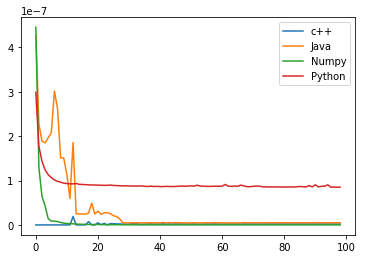

In [48]:
plt.plot(Cpp,label='c++')
plt.plot(Java,label='Java')
plt.plot(Numpy,label='Numpy')
plt.plot(Python,label='Python')
plt.legend(loc='upper right');

Comparación IDEone

In [49]:
Cpp=[
3.33333e-09,
6.66667e-10,
3.57143e-10,
3.11111e-10,
1.51515e-10,
1.41287e-10,
8.33333e-11,
7.98838e-11,
7.89474e-11,
7.87092e-11,
6.94444e-11,
6.86391e-11,
5.66893e-11,
7.20307e-11,
4.15827e-11,
5.34759e-11,
5.37919e-11,
5.4653e-11,
5.83333e-11,
5.53067e-11,
5.52566e-11,
5.83911e-11,
3.95242e-11,
4.50612e-11,
4.43787e-11,
4.55522e-11,
4.6846e-11,
4.81882e-11,
4.72693e-11,
4.86174e-11,
3.62723e-11,
4.09691e-11,
4.06704e-11,
4.15262e-11,
4.02104e-11,
4.46281e-11,
4.3675e-11,
4.5937e-11,
3.5443e-11,
3.84104e-11,
3.74969e-11,
3.9958e-11,
3.93037e-11,
3.87294e-11,
3.88978e-11,
3.99149e-11,
3.08845e-11,
3.39635e-11,
3.49495e-11,
3.61247e-11,
3.41817e-11,
3.75324e-11,
3.65691e-11,
3.81227e-11,
3.06812e-11,
3.30394e-11,
3.18203e-11,
3.28769e-11,
3.16293e-11,
3.44926e-11,
3.38824e-11,
3.56362e-11,
2.82588e-11,
3.05674e-11,
2.9949e-11,
3.11706e-11,
2.92676e-11,
3.18279e-11,
3.1317e-11,
3.19086e-11,
2.55358e-11,
2.9442e-11,
2.80755e-11,
2.91365e-11,
2.70129e-11,
2.89923e-11,
2.808e-11,
2.8913e-11,
2.39387e-11,
2.55793e-11,
2.49541e-11,
2.63222e-11,
2.45088e-11,
2.68053e-11,
2.55947e-11,
2.59959e-11,
2.19599e-11,
2.32094e-11,
2.30499e-11,
2.44719e-11,
2.18605e-11,
2.4299e-11,
2.19024e-11,
2.14689e-11,
1.78326e-11,
1.99677e-11,
1.89131e-11,
2.00228e-11,
1.95578e-11,
]
Python=[
6.08333333333e-07 ,
1.02222222222e-07 ,
4.10714285715e-08 ,
2.04444444444e-08 ,
1.38888888889e-08 ,
7.84929356358e-09 ,
5.20833333334e-09 ,
4.42992011621e-09 ,
3.05263157895e-09 ,
2.47933884297e-09 ,
2.17391304348e-09 ,
1.775147929e-09 ,
1.54950869237e-09 ,
1.44061302682e-09 ,
1.26008064516e-09 ,
1.11146062703e-09 ,
1.06701940035e-09 ,
9.50812308154e-10 ,
9.48717948718e-10 ,
8.57253470493e-10 ,
8.16836440516e-10 ,
7.72946859903e-10 ,
7.46158392435e-10 ,
7.37959183674e-10 ,
6.96136442743e-10 ,
6.5998912959e-10 ,
6.42393320964e-10 ,
6.29993533179e-10 ,
6.1770244821e-10 ,
6.10702649222e-10 ,
6.12289186508e-10 ,
6.9647524193e-10 ,
7.04952744926e-10 ,
6.86187518486e-10 ,
6.74882629108e-10 ,
6.65419214105e-10 ,
6.59279778393e-10 ,
7.45408437716e-10 ,
6.59018987342e-10 ,
6.13979039519e-10 ,
6.10605688058e-10 ,
6.02551458658e-10 ,
6.05585636934e-10 ,
5.9925093633e-10 ,
5.9774818754e-10 ,
5.90448653358e-10 ,
5.81140350877e-10 ,
5.74502891836e-10 ,
5.55555555556e-10 ,
5.53480953632e-10 ,
5.4755270868e-10 ,
5.44508298157e-10 ,
5.4036383216e-10 ,
5.36810978846e-10 ,
5.14513237727e-10 ,
5.17790361636e-10 ,
5.112960761e-10 ,
5.10217861554e-10 ,
5.0466853408e-10 ,
4.87294582235e-10 ,
4.88566280044e-10 ,
4.42025699169e-10 ,
4.0023683563e-10 ,
4.02183386083e-10 ,
4.1602702949e-10 ,
3.9980771711e-10 ,
3.90074330386e-10 ,
4.03981866044e-10 ,
4.02437233886e-10 ,
4.0110807689e-10 ,
4.09274367608e-10 ,
3.91611287619e-10 ,
3.80634357468e-10 ,
3.79656972409e-10 ,
3.7916659023e-10 ,
3.6786064288e-10 ,
3.67118406821e-10 ,
3.66081297195e-10 ,
3.48958333333e-10 ,
3.51218994984e-10 ,
3.53098323741e-10 ,
3.40903592464e-10 ,
3.39032818716e-10 ,
3.34718781352e-10 ,
3.29243877677e-10 ,
3.32432946373e-10 ,
3.21207201889e-10 ,
3.18469747514e-10 ,
3.14987240499e-10 ,
3.08300769718e-10 ,
3.07054241945e-10 ,
3.13987244268e-10 ,
3.0217898098e-10 ,
3.04445323836e-10 ,
3.03933064282e-10 ,
3.05076662902e-10 ,
3.04734138553e-10 ,
3.01740680144e-10 ,
3.02310231256e-10
]
Numpy=[
6e-07 ,
1.04444444444e-07 ,
3.92857142856e-08 ,
2e-08 ,
1.13636363637e-08 ,
7.84929356356e-09 ,
5.31250000001e-09 ,
3.77632534494e-09 ,
2.94736842106e-09 ,
2.43998425817e-09 ,
2.08333333334e-09 ,
1.8224852071e-09 ,
1.54950869237e-09 ,
1.31800766284e-09 ,
1.20967741936e-09 ,
1.0904896718e-09 ,
1.00529100529e-09 ,
9.20865463802e-10 ,
8.91025641026e-10 ,
8.40661467839e-10 ,
8.07226600038e-10 ,
7.85549254358e-10 ,
7.23995271868e-10 ,
6.98775510206e-10 ,
7.07738716789e-10 ,
6.62577322256e-10 ,
6.44712430427e-10 ,
6.44596032292e-10 ,
5.70621468927e-10 ,
6.24349635796e-10 ,
7.62648809524e-10 ,
6.83760683761e-10 ,
7.08826111656e-10 ,
6.66075125702e-10 ,
6.55320813771e-10 ,
6.38402193382e-10 ,
6.36195752539e-10 ,
7.23208415516e-10 ,
6.19462025317e-10 ,
6.1397903952e-10 ,
6.1470371281e-10 ,
6.10186746413e-10 ,
5.97273677211e-10 ,
6.13122485782e-10 ,
5.97228858098e-10 ,
6.02617834178e-10 ,
5.65149853801e-10 ,
5.60333538002e-10 ,
5.65252525253e-10 ,
5.59571528087e-10 ,
5.4862986155e-10 ,
5.47898760786e-10 ,
5.45171339564e-10 ,
5.18007430434e-10 ,
5.13364129436e-10 ,
5.16156094319e-10 ,
5.18275345086e-10 ,
5.1832045512e-10 ,
4.89962651727e-10 ,
4.93069267348e-10 ,
4.85393771732e-10 ,
4.84555303603e-10 ,
4.7424796998e-10 ,
4.62914545204e-10 ,
4.63868385451e-10 ,
4.5843054953e-10 ,
4.4774445726e-10 ,
4.39550667912e-10 ,
4.38702099545e-10 ,
4.35999274038e-10 ,
4.19391565225e-10 ,
4.26553471247e-10 ,
4.18523874122e-10 ,
4.07576435496e-10 ,
3.78249344169e-10 ,
3.64663771845e-10 ,
3.88220822464e-10 ,
3.80267330178e-10 ,
3.57606132075e-10 ,
3.6608190124e-10 ,
3.60671233527e-10 ,
3.60082168763e-10 ,
3.50234904341e-10 ,
3.48805307017e-10 ,
3.45057704655e-10 ,
3.36480487416e-10 ,
3.34636953955e-10 ,
3.29596574079e-10 ,
3.25815573488e-10 ,
3.21310648552e-10 ,
3.14866177033e-10 ,
3.17799589392e-10 ,
3.08715197672e-10 ,
3.0819739407e-10 ,
3.00694898924e-10 ,
2.96651260479e-10 ,
2.97579000203e-10 ,
2.97700897609e-10 ,
2.97400123581e-10
]
Java=[
5.396666666666667E-7,
3.203777777777778E-7,
2.748660714285714E-7,
2.595511111111111E-7,
2.3474242424242425E-7,
2.2405180533751963E-7,
2.3827291666666667E-7,
2.0639651416122004E-7,
2.0489526315789473E-7,
1.9707319952774498E-7,
1.1570471014492753E-6,
3.9668E-6,
5.710695389266818E-9,
5.765977011494253E-9,
5.741809475806452E-9,
5.569571143965608E-9,
5.639241622574955E-9,
5.507000074867111E-9,
5.604038461538462E-9,
5.479951330125546E-9,
5.553286565443014E-9,
5.4284814114681795E-9,
5.681368203309693E-9,
5.408979591836734E-9,
5.759310824921684E-9,
5.3549188601599505E-9,
5.411178107606679E-9,
5.353693389240044E-9,
5.251751412429379E-9,
5.186161955613176E-9,
5.236855158730159E-9,
5.2353747262838175E-9,
5.28384031400093E-9,
5.212221236320615E-9,
5.206551034602678E-9,
5.1942023474789115E-9,
5.2337211449676825E-9,
5.1488767642613795E-9,
5.254208860759494E-9,
5.137065679599885E-9,
5.206526787421796E-9,
5.2087805809181436E-9,
4.780700816946898E-9,
4.472542655014565E-9,
4.503541826793245E-9,
4.4637139366326415E-9,
4.63469480994152E-9,
5.068352104149044E-9,
5.03169696969697E-9,
5.027537009756339E-9,
5.111284253461251E-9,
4.720327518689925E-9,
4.475174031768009E-9,
4.527942982788688E-9,
4.638410093767237E-9,
4.8648760544428915E-9,
4.8526676317013905E-9,
5.103477485838876E-9,
4.8313048552754436E-9,
4.5347891462572265E-9,
4.573477407510808E-9,
4.559433610481229E-9,
4.584939791461614E-9,
4.487902389798633E-9,
4.466950910913438E-9,
4.4625709964374064E-9,
4.491798026400102E-9,
4.623406111394742E-9,
4.615445602701512E-9,
4.591179280256506E-9,
4.63725394975395E-9,
4.635371843070771E-9,
4.608002514373171E-9,
4.669796271439225E-9,
4.701535011282127E-9,
4.620823536025981E-9,
4.6266643337362945E-9,
4.583469495436486E-9,
4.5782537342767296E-9,
4.584816547242742E-9,
4.59928449688507E-9,
4.6076212847006864E-9,
4.582292048555949E-9,
4.6023889764746835E-9,
4.666760758937184E-9,
4.709138354880762E-9,
4.7290680342384886E-9,
4.590601255191627E-9,
4.601186288709566E-9,
4.654887277739564E-9,
4.646090287892404E-9,
4.595532056510204E-9,
4.568273204174463E-9,
4.577802400738689E-9,
4.593655695535194E-9,
4.595380236208635E-9,
4.573491814308141E-9,
4.5662811781870384E-9,
4.56136783919598E-9,
]


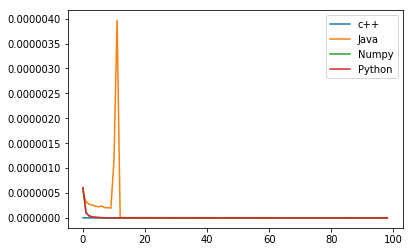

In [53]:
plt.plot(Cpp,label='c++')
plt.plot(Java,label='Java')
plt.plot(Numpy,label='Numpy')
plt.plot(Python,label='Python')
plt.legend(loc='upper right');